# Whole-brain results
Natalia Vélez, August 2022

In [1]:
%matplotlib inline

import os, sys
import pandas as pd
import numpy as np
from nilearn import image,plotting,masking
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from os.path import join as opj
from scipy.io import loadmat
from scipy import stats

sys.path.append('..')
from utils import gsearch, str_extract, print_list

sns.set_style('white')
sns.set_context('talk')

Setup

In [2]:
# project directory
data_dir = '/n/gershman_ncf/Lab/natalia_teaching/BIDS_data/derivatives/glm'

# thresholds
pthresh = [3.421034, 6.168335] # from SPM
extent = 10 # cluster extent threshold
coords = [0,-58,-16] # cut coords for plotting

Helper function: Plot overlays

In [3]:
def plot_thresholded_overlays(p001_img, fwe_img):
    # get stat map data
    p001_data = p001_img.get_fdata()
    fwe_data = fwe_img.get_fdata()

    # binarize stat maps
    bin_data = np.zeros(p001_data.shape)
    bin_data[p001_data < 0] = 1
    bin_data[p001_data > 0] = 2
    bin_data[fwe_data < 0] = 3
    bin_data[fwe_data > 0] = 4

    # define color map
    cmap = colors.ListedColormap(['#56C1FF', '#FFD932', '#0076BA', '#F27200'])

    # make new image
    bin_img = image.new_img_like(p001_img, bin_data)
    plotting.plot_roi(bin_img, draw_cross=False, cut_coords=coords, cmap=cmap, alpha=.9)

## GLM 1: Main model

Setup:

In [4]:
glm1_dir = opj(data_dir, 'group', 'task-teaching_model-parametric')
glm1_cons = {'pTrue': 1, 'KL': 3}

### Posterior belief in correct answer (pTrue)

Load statistical map

/n/home_fasse/nvelezalicea/.local/lib/python3.8/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


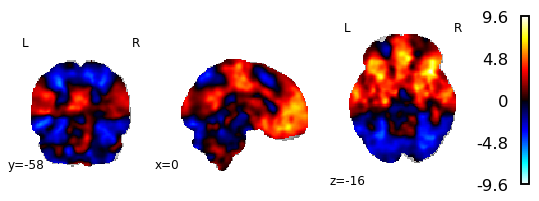

In [5]:
glm1_ptrue_f = opj(glm1_dir, 'con-0001', 'spmT_0001.nii')
glm1_ptrue = image.load_img(glm1_ptrue_f)

plotting.plot_stat_map(glm1_ptrue, draw_cross=False, cut_coords=coords)
plt.savefig('plots/wb_pTrue_unthresholded.png')

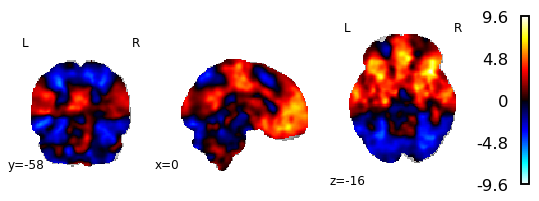

In [6]:
plotting.plot_stat_map(glm1_ptrue, draw_cross=False, cut_coords=coords)
plt.savefig('plots/wb_pTrue_unthresholded.png_view2.png')

p < .001 uncorrected:

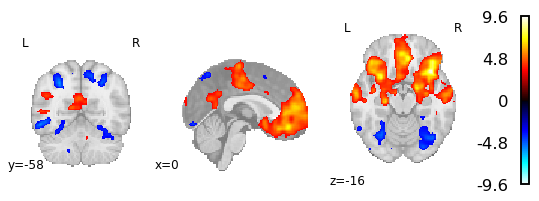

In [7]:
glm1_ptrue_p001 = image.threshold_img(glm1_ptrue, pthresh[0], cluster_threshold=10)
plotting.plot_stat_map(glm1_ptrue_p001, draw_cross=False, cut_coords=coords)
plt.savefig('plots/wb_pTrue_p001unc.png')

FWE < .05

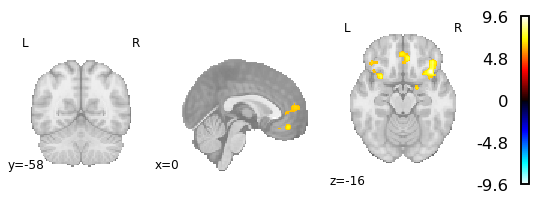

In [8]:
glm1_ptrue_fwe = image.threshold_img(glm1_ptrue, pthresh[1], cluster_threshold=10)
plotting.plot_stat_map(glm1_ptrue_fwe, draw_cross=False, cut_coords=coords)
plt.savefig('plots/wb_pTrue_fwe.png')

Binarize stat maps:

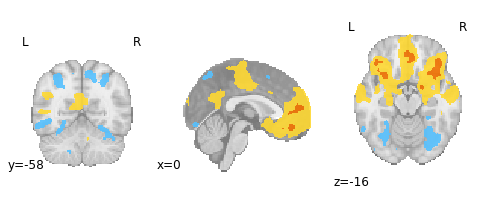

In [9]:
plot_thresholded_overlays(glm1_ptrue_p001,glm1_ptrue_fwe)
plt.savefig('plots/wb_pTrue_overlays.png', bbox_inches='tight')

### Belief update (KL)

Unthresholded:

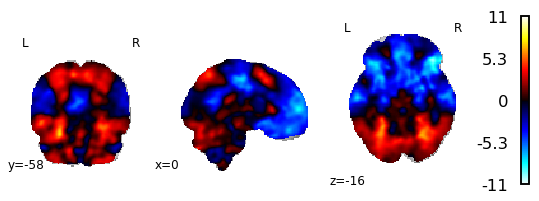

In [10]:
glm1_kl_f = opj(glm1_dir, 'con-0003', 'spmT_0001.nii')
glm1_kl = image.load_img(glm1_kl_f)

plotting.plot_stat_map(glm1_kl, draw_cross=False, cut_coords=coords)
plt.savefig('plots/wb_KL_unthresholded.png')

p < 0.001 uncorrected:

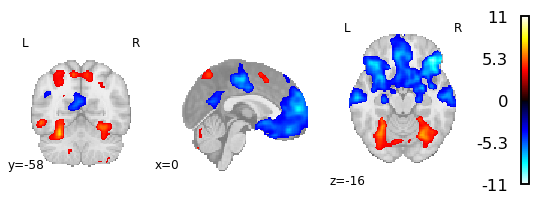

In [11]:
glm1_kl_p001 = image.threshold_img(glm1_kl, pthresh[0], cluster_threshold=10)
plotting.plot_stat_map(glm1_kl_p001, draw_cross=False, cut_coords=coords)
plt.savefig('plots/wb_kl_p001unc.png')

FWE < 0.05:

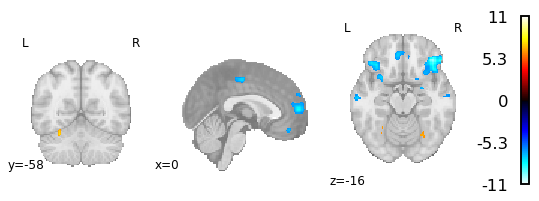

In [12]:
glm1_kl_fwe = image.threshold_img(glm1_kl, pthresh[1], cluster_threshold=10)
plotting.plot_stat_map(glm1_kl_fwe, draw_cross=False, cut_coords=coords)
plt.savefig('plots/wb_kl_fwe.png')

Plot overlays:

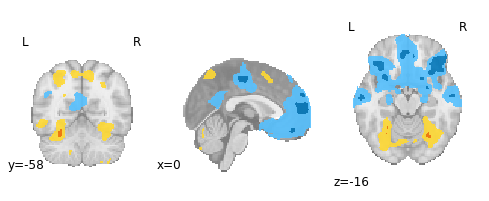

In [13]:
plot_thresholded_overlays(glm1_kl_p001, glm1_kl_fwe)
plt.savefig('plots/wb_kl_overlays.png')

## GLM 2: Empirically-derived model

Setup:

In [14]:
glm2_dir = opj(data_dir, 'group', 'task-teaching_model-empirical')

### Posterior belief in correct answer (pTrue)

Unthresholded:

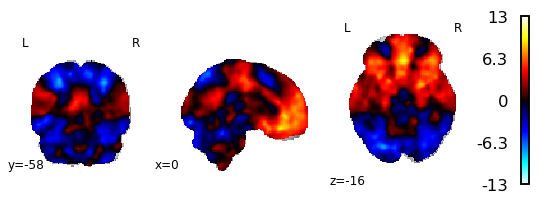

In [15]:
glm2_ptrue_f = opj(glm2_dir, 'con-0001', 'spmT_0001.nii')
glm2_ptrue = image.load_img(glm2_ptrue_f)

plotting.plot_stat_map(glm2_ptrue, draw_cross=False, cut_coords=[0,-58,-16])
plt.savefig('plots/wb_empirical_pTrue_unthresholded.png')

p < .001 uncorrected

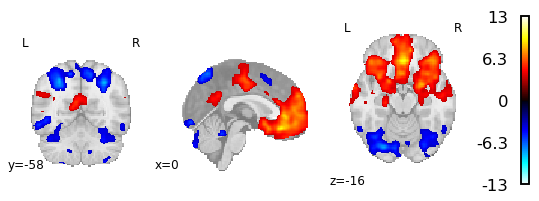

In [16]:
glm2_ptrue_p001 = image.threshold_img(glm2_ptrue, pthresh[0], cluster_threshold=10)
plotting.plot_stat_map(glm2_ptrue_p001, draw_cross=False, cut_coords=[0,-58,-16])
plt.savefig('plots/wb_empirical_pTrue_p001unc.png')

FWE < 0.05

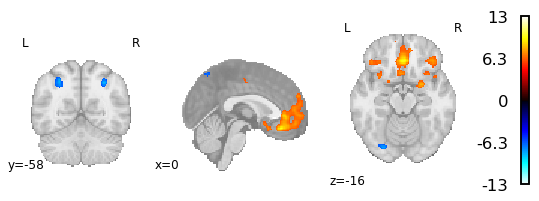

In [17]:
glm2_ptrue_fwe = image.threshold_img(glm2_ptrue, pthresh[1], cluster_threshold=10)
plotting.plot_stat_map(glm2_ptrue_fwe, draw_cross=False, cut_coords=[0,-58,-16])
plt.savefig('plots/wb_empirical_pTrue_fwe.png')

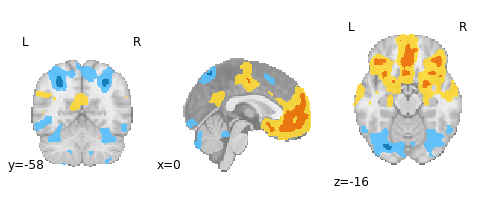

In [18]:
plot_thresholded_overlays(glm2_ptrue_p001, glm2_ptrue_fwe)
plt.savefig('plots/wb_empirical_ptrue_overlays.png', bbox_inches='tight')

### Belief update (KL)

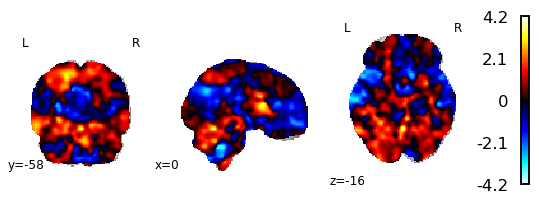

In [19]:
glm2_kl_f = opj(glm2_dir, 'con-0003', 'spmT_0001.nii')
glm2_kl = image.load_img(glm2_kl_f)

plotting.plot_stat_map(glm2_kl, draw_cross=False, cut_coords=[0,-58,-16])
plt.savefig('plots/wb_empirical_kl_unthresholded.png')

p < .001 uncorrected

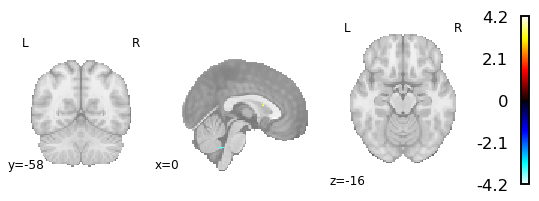

In [20]:
glm2_kl_p001 = image.threshold_img(glm2_kl, pthresh[0], cluster_threshold=10)
plotting.plot_stat_map(glm2_kl_p001, draw_cross=False, cut_coords=coords)
plt.savefig('plots/wb_empirical_kl_p001unc.png')

FWE < .05

/n/home_fasse/nvelezalicea/.local/lib/python3.8/site-packages/nilearn/_utils/param_validation.py:72: UserWarning: The given float value must not exceed 4.237775802612305. But, you have given threshold=6.168335 
  warnings.warn("The given float value must not exceed {0}. "
/n/home_fasse/nvelezalicea/.local/lib/python3.8/site-packages/nilearn/plotting/displays/_slicers.py:383: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


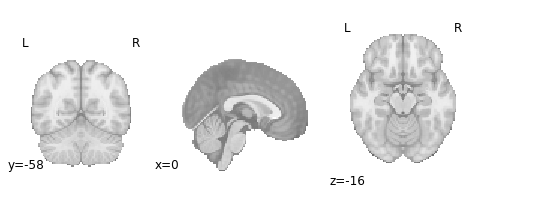

In [21]:
glm2_kl_fwe = image.threshold_img(glm2_kl, pthresh[1], cluster_threshold=10)
plotting.plot_stat_map(glm2_kl_fwe, draw_cross=False, cut_coords=coords)
plt.savefig('plots/wb_empirical_kl_fwe.png')

Plot overlays

/n/home_fasse/nvelezalicea/.local/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


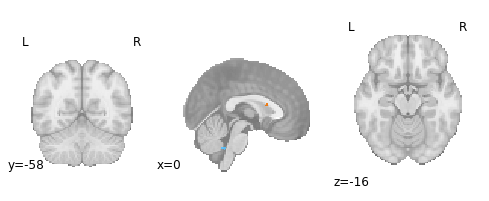

In [22]:
plot_thresholded_overlays(glm2_kl_p001, glm2_kl_fwe)
plt.savefig('plots/wb_empirical_kl_overlays.png', bbox_inches='tight')

## GLM 3-4: Estimating each parametric regressor in a separate GLM

### GLM3: Posterior belief in correct answer

Unthresholded:

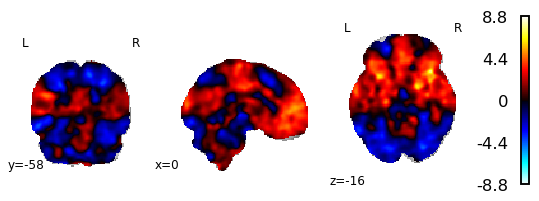

In [23]:
glm3_dir = opj(data_dir, 'group', 'task-teaching_model-parametricpTrue')
glm3_ptrue_f = opj(glm3_dir, 'con-0001', 'spmT_0001.nii')
glm3_ptrue = image.load_img(glm3_ptrue_f)

plotting.plot_stat_map(glm3_ptrue, draw_cross=False, cut_coords=coords)
plt.savefig('plots/wb_separate_ptrue_unthresholded.png')

p < .001 uncorrected

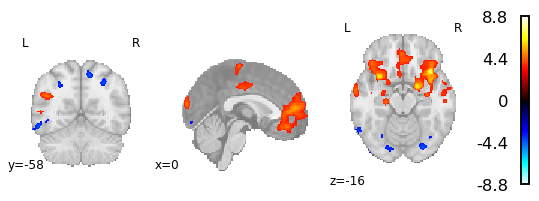

In [24]:
glm3_ptrue_p001 = image.threshold_img(glm3_ptrue, pthresh[0], cluster_threshold=10)
plotting.plot_stat_map(glm3_ptrue_p001, draw_cross=False, cut_coords=coords)
plt.savefig('plots/wb_separate_pTrue_p001unc.png')

FWE < .05

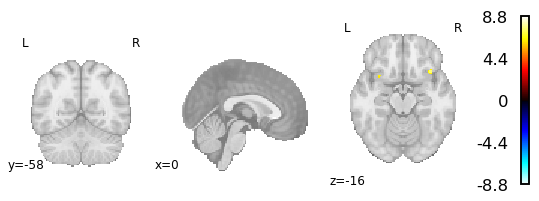

In [25]:
glm3_ptrue_fwe = image.threshold_img(glm3_ptrue, pthresh[1], cluster_threshold=10)
plotting.plot_stat_map(glm3_ptrue_fwe, draw_cross=False, cut_coords=coords)
plt.savefig('plots/wb_separate_pTrue_fwe.png')

Plot overlays

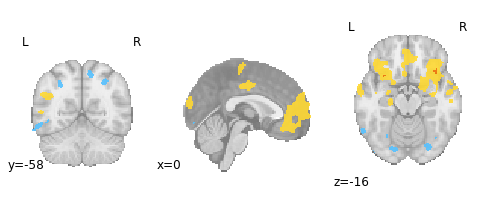

In [32]:
plot_thresholded_overlays(glm3_ptrue_p001, glm3_ptrue_fwe)
plt.savefig('plots/wb_separate_ptrue_overlays.png', bbox_inches='tight')

### GLM4: Belief update

Unthresholded:

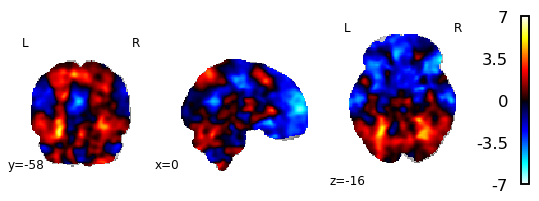

In [27]:
glm4_dir = opj(data_dir, 'group', 'task-teaching_model-parametricKL')
glm4_kl_f = opj(glm4_dir, 'con-0001', 'spmT_0001.nii')
glm4_kl = image.load_img(glm4_kl_f)

plotting.plot_stat_map(glm4_kl, draw_cross=False, cut_coords=coords)
plt.savefig('plots/wb_separate_kl_unthresholded.png')

p < .001 uncorrected

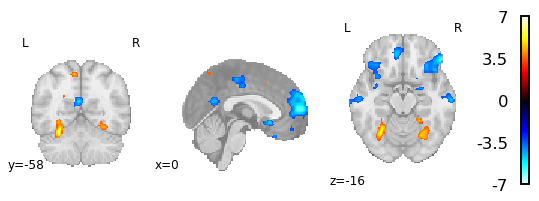

In [28]:
glm4_kl_p001 = image.threshold_img(glm4_kl, pthresh[0], cluster_threshold=10)
plotting.plot_stat_map(glm4_kl_p001, draw_cross=False, cut_coords=coords)
plt.savefig('plots/wb_separate_kl_p001unc.png')

FWE < .05

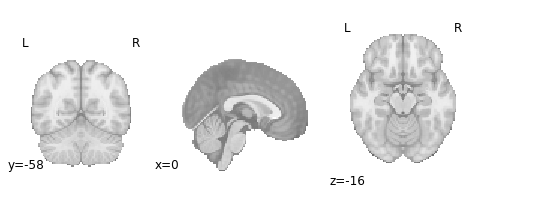

In [29]:
glm4_kl_fwe = image.threshold_img(glm4_kl, pthresh[1], cluster_threshold=10)
plotting.plot_stat_map(glm4_kl_fwe, draw_cross=False, cut_coords=coords)
plt.savefig('plots/wb_separate_kl_fwe.png')

Plot overlays

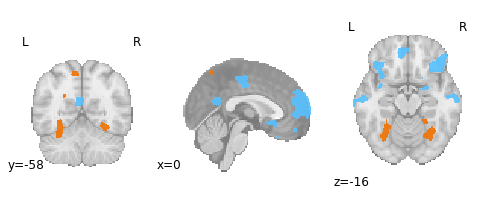

In [31]:
plot_thresholded_overlays(glm4_kl_p001, glm4_kl_fwe)
plt.savefig('plots/wb_separate_kl_overlays.png', bbox_inches='tight')